In [1]:
from fastbook import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)

In [3]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs = 8, fnames = get_image_files(path/'images'),
    label_func = lambda x: (path/'labels'/f'{x.stem}_P{x.suffix}'),
    codes = np.loadtxt(path/'codes.txt', dtype = 'str')
)

In [4]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,3.008299,2.424741,00:48


epoch,train_loss,valid_loss,time
0,1.772811,1.566294,00:56
1,1.555523,1.276595,00:54
2,1.388780,1.068932,00:54
3,1.244944,0.924167,00:54
4,1.119481,0.781905,00:52
5,1.011875,0.783753,00:56
6,0.927787,0.715191,00:53
7,0.860944,0.707224,00:53


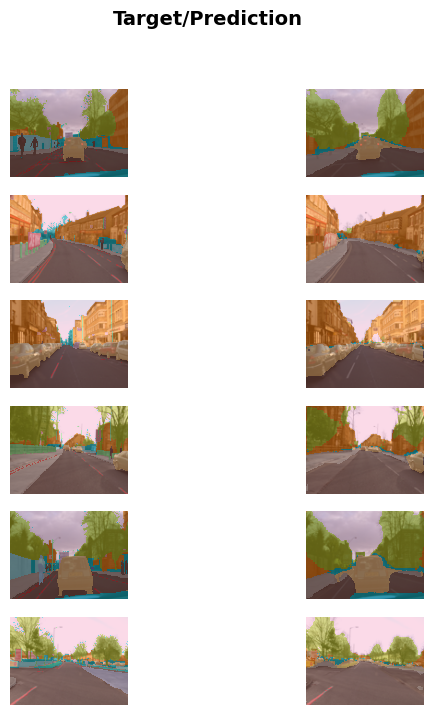

In [5]:
learn.show_results(max_n = 6, figsize=(7, 8))

In [6]:
res, _, prob = learn.predict(PILImage.create('street.jpeg'))
# print(res, _, prob)


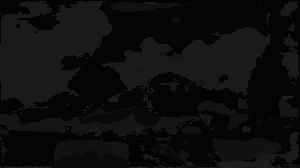

In [7]:
PILImage.create(res)

In [ ]:
doc(learn.show_results)